In [1]:
%matplotlib inline

In [2]:
import shapely as sh
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
from shapely.geometry import Point
from descartes.patch import PolygonPatch
import IPython 
import numpy as np
from matplotlib import pyplot

In [4]:
#coordinates are taken from
#https://desi.lbl.gov/trac/browser/code/focalplane/positioner_control/trunk/anticollision/pos_geometry.m?rev=1660

In [5]:
#general paramaters
ferrule_radius = 1.250/2
R1 = 3.000 # distance from central axis to eccentric axis
R2 = 3.000 # distance from eccentric axis to ferrule axis
Ei = 6.800 # inner clear rotation envelope
Eo = 9.990 # outer clear rotation envelope

In [6]:
lower_ferrule_pos = np.array(((0.387, 0.990), (0.967,0.410), (0.967, -0.410), (0.387, -0.990), (-0.649, -0.990), 
                    (-1.000, -0.639), (-1.000, 0.639), (-0.649, 0.990)))
lower_ferrule_pos[:,0]=lower_ferrule_pos[:,0]+3.0
low_poly= Polygon(lower_ferrule_pos)

In [7]:
upper_ferrule_pos=np.array(((0.387, 0.990), (0.967, 0.410), (0.967,-0.410), (0.387,-0.990), (-2.235,-0.990), 
                   (-2.668, -1.240), (-3.514, -1.240), (-4.240,-0.514), (-4.240,0.514), (-3.682,1.072), 
                  (-2.994,1.339), (-2.944,1.922), (-2.688, 2.015 ), (-1.981,1.757 ), (-1.844, 0.990)))
upper_ferrule_pos[:,0]=upper_ferrule_pos[:,0]+3.0
up_poly = Polygon(upper_ferrule_pos)

In [8]:
central_axis_body = np.array((( 4.358 , -2.500), (5.095,-0.474),(5.095,0.605),(4.348,1.792), 
                    (3.000,2.180), (1.652, 1.792), (0.905, 0.605), (0.905 ,-0.356), 
                    (1.759, -2.792), (2.771, -2.500)))
central_poly = Polygon(central_axis_body)

In [9]:
Ei_circ_resn  = 32
Eo_circ_resn  = 32;
Eo = 9.990 #clear rotational envelope
tmp = np.zeros((Eo_circ_resn,2))
tmp[:,0] = Eo/2*np.cos(np.linspace(0,2*np.pi,Eo_circ_resn))
tmp[:,1] = Eo/2*np.sin(np.linspace(0,2*np.pi,Eo_circ_resn))
Eo_poly = Polygon(tmp);
ctr_arm_poly = Polygon(((0,0),(R1,0), (0,0))) #central arm polygon

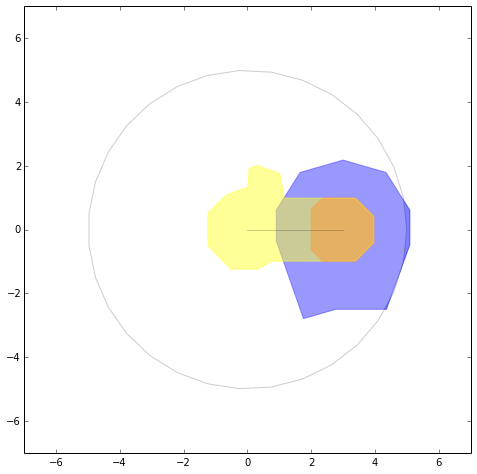

In [10]:
fig, ax = pyplot.subplots(figsize=(8, 8))
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)

patch_u = PolygonPatch(up_poly, facecolor='yellow', edgecolor='yellow', alpha=0.5, zorder=2)
patch_c = PolygonPatch(central_poly, facecolor='blue', edgecolor='blue', alpha=0.5, zorder=2)
patch_l = PolygonPatch(low_poly, facecolor='red', edgecolor='red', alpha=0.5, zorder=2)

patch_outer = PolygonPatch(Eo_poly, facecolor='white', edgecolor='black', alpha=0.2, zorder=2)
patch_ctr_arm = PolygonPatch(ctr_arm_poly, facecolor='white', edgecolor='black', alpha=0.2, zorder=2)

ax.add_patch(patch_c)
ax.add_patch(patch_l)
ax.add_patch(patch_u)
ax.add_patch(patch_outer)
ax.add_patch(patch_ctr_arm)

In [11]:
upper_ferrule_pos=np.array(((0.387, 0.990), (0.967, 0.410), (0.967,-0.410), (0.387,-0.990), (-2.235,-0.990), 
                   (-2.668, -1.240), (-3.514, -1.240), (-4.240,-0.514), (-4.240,0.514), (-3.682,1.072), 
                  (-2.994,1.339), (-2.944,1.922), (-2.688, 2.015 ), (-1.981,1.757 ), (-1.844, 0.990)))
upper_ferrule_pos[:,0] = -1.0*upper_ferrule_pos[:,0]
upper_ferrule_pos[:,0]=upper_ferrule_pos[:,0]
up_poly = Polygon(upper_ferrule_pos)

In [12]:
lower_ferrule_pos = np.array(((0.387, 0.990), (0.967,0.410), (0.967, -0.410), (0.387, -0.990), (-0.649, -0.990), 
                    (-1.000, -0.639), (-1.000, 0.639), (-0.649, 0.990)))
lower_ferrule_pos[:,0] = -1.0*lower_ferrule_pos[:,0]
lower_ferrule_pos[:,0]=lower_ferrule_pos[:,0]
low_poly= Polygon(lower_ferrule_pos)

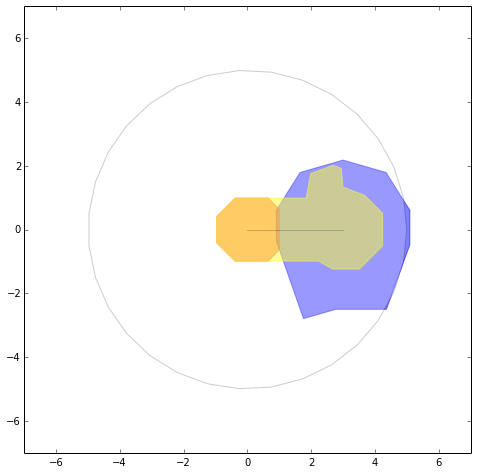

In [13]:
fig, ax = pyplot.subplots(figsize=(8, 8))
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)

patch_u = PolygonPatch(up_poly, facecolor='yellow', edgecolor='yellow', alpha=0.5, zorder=2)
patch_c = PolygonPatch(central_poly, facecolor='blue', edgecolor='blue', alpha=0.5, zorder=2)
patch_l = PolygonPatch(low_poly, facecolor='red', edgecolor='red', alpha=0.5, zorder=2)

patch_outer = PolygonPatch(Eo_poly, facecolor='white', edgecolor='black', alpha=0.2, zorder=2)
patch_ctr_arm = PolygonPatch(ctr_arm_poly, facecolor='white', edgecolor='black', alpha=0.2, zorder=2)

ax.add_patch(patch_c)
ax.add_patch(patch_l)
ax.add_patch(patch_u)
ax.add_patch(patch_outer)
ax.add_patch(patch_ctr_arm)

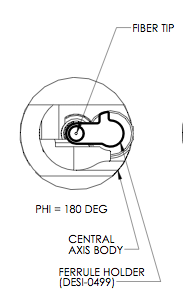

In [14]:
IPython.display.Image("../img/theta_0_phi_180.png")